In [27]:
import numpy as np

from utils.graph_utils import girth_average, girth_median, girth_min_node_fraction
from utils.ldpc_utils import create_parity_check_matrix
from utils.graph_utils import create_tanner_graph as tanner_graph
from utils.simulation_utils import run_binary_channel_simulation, std_from_signal_to_noise_ration, run_gaussian_channel_simulation

from ldpc import LDPC

In [20]:
n = 400
w_r = 3
w_c = 2
p_values = [i/100 for i in range(1, 6)]
snr_values = [*range(7, 10)]
num_samples = 100
num_iterations = 50
nr_of_matrices = 500

In [3]:
#girth average
ga_values = []
ga_best_values = 0
ga_best_matrix = None

#girth median
gmedian_values = []
gmedian_best_value = 0
gmedian_best_matrix = None

#girth min node fraction
gmin_values = []
gmin_best_value = 0
gmin_best_matrix = None


for i in range(nr_of_matrices):
    if i % 50 == 0:
        print(f'Iteration {i}')
    matrix = create_parity_check_matrix(n, w_r, w_c)
    
    if matrix is not None: 
        ga = girth_average(tanner_graph(matrix))
        gm = girth_median(tanner_graph(matrix))
        gmin = girth_min_node_fraction(tanner_graph(matrix))
        if ga != np.inf: ga_values.append(ga)
        if gm != np.inf: gmedian_values.append(gm)
        if gmin != np.inf: gmin_values.append(gmin)
    
        if ga > ga_best_values:
            ga_best_values = ga
            ga_best_matrix = matrix
    
        if gm > gmedian_best_value:
            gmedian_best_value = gm
            gmedian_best_matrix = matrix
            
        if gmin > gmin_best_value:
            gmin_best_value = gmin
            gmin_best_matrix = matrix
            
    else:
        print('Matrix not valid')

random_matrix = None
while random_matrix is None:
    random_matrix = create_parity_check_matrix(n, w_r, w_c)

Iteration 0
Matrix not valid
Iteration 50
Iteration 100
Iteration 150
Iteration 200
Matrix not valid
Iteration 250
Iteration 300
Iteration 350
Iteration 400
Iteration 450


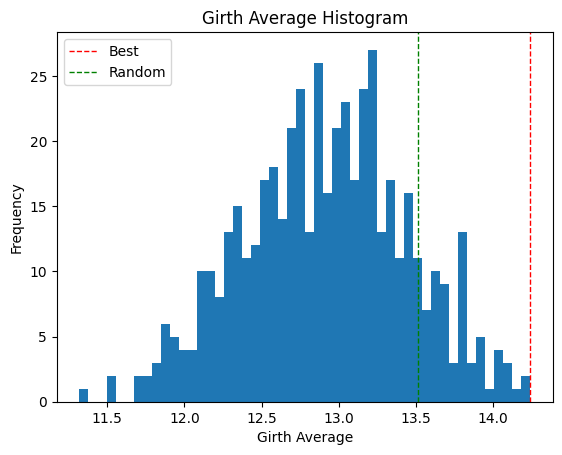

In [4]:
# make a histogram of the girth average values
# and add a vertical line for the best value and the random value
import matplotlib.pyplot as plt
plt.hist(ga_values, bins=50)
plt.axvline(ga_best_values, color='r', linestyle='dashed', linewidth=1)
plt.axvline(girth_average(tanner_graph(random_matrix)), color='g', linestyle='dashed', linewidth=1)
# add some nice looking labels PLEASE SIR
plt.xlabel('Girth Average')
plt.ylabel('Frequency')
plt.title('Girth Average Histogram')
# add a legend
plt.legend(['Best', 'Random'])
# show the plot

plt.show()

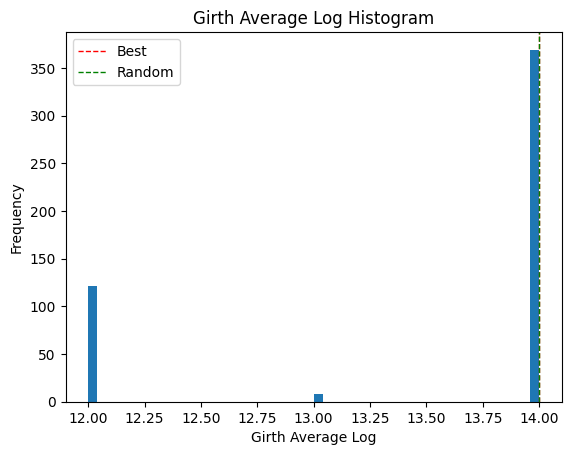

In [5]:
# makea histogram of the girth average log values
# and add a vertical line for the best value and the random value
plt.hist(gmedian_values, bins=50)
plt.axvline(gmedian_best_value, color='r', linestyle='dashed', linewidth=1)
plt.axvline(girth_median(tanner_graph(random_matrix)), color='g', linestyle='dashed', linewidth=1)
# add some nice looking labels
plt.xlabel('Girth Median')
plt.ylabel('Frequency')
plt.title('Girth Median Histogram')
# add a legend
plt.legend(['Best', 'Random'])

plt.show()

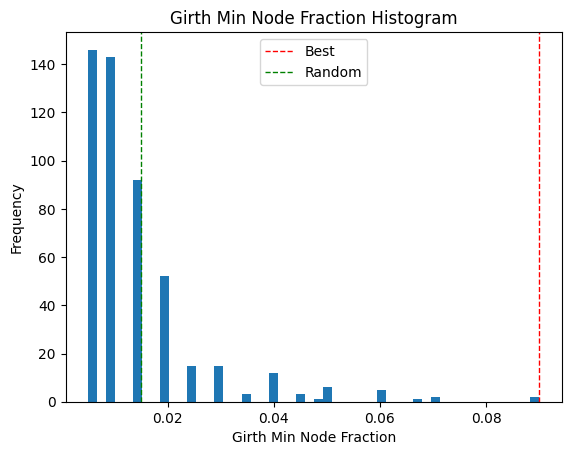

In [6]:
# make a histogram of the girth min node fraction values
# and add a vertical line for the best value and the random value
plt.hist(gmin_values, bins=50)
plt.axvline(gmin_best_value, color='r', linestyle='dashed', linewidth=1)
plt.axvline(girth_min_node_fraction(tanner_graph(random_matrix)), color='g', linestyle='dashed', linewidth=1)
# add some nice looking labels
plt.xlabel('Girth Min Node Fraction')
plt.ylabel('Frequency')
plt.title('Girth Min Node Fraction Histogram')
# add a legend
plt.legend(['Best', 'Random'])

plt.show()

In [7]:
code_ga = LDPC(ga_best_matrix)
convergence_rates_ga = []
bit_errors_ga = []
for p in p_values:
    print(f'Running simulation for p={p} with GA code')
    convergence_rate, bit_error_rate = run_binary_channel_simulation(code_ga, p, num_samples, num_iterations)
    convergence_rates_ga.append(convergence_rate)
    bit_errors_ga.append(bit_error_rate)
    
code_gm = LDPC(gmedian_best_matrix)
convergence_rates_gal = []
bit_errors_gal = []
for p in p_values:
    print(f'Running simulation for p={p} with GM code')
    convergence_rate, bit_error_rate = run_binary_channel_simulation(code_gm, p, num_samples, num_iterations)
    convergence_rates_gal.append(convergence_rate)
    bit_errors_gal.append(bit_error_rate)
    
code_random = LDPC(random_matrix)
convergence_rates_random = []
bit_errors_random = []
for p in p_values:
    print(f'Running simulation for p={p} with random code')
    convergence_rate, bit_error_rate = run_binary_channel_simulation(code_random, p, num_samples, num_iterations)
    convergence_rates_random.append(convergence_rate)
    bit_errors_random.append(bit_error_rate)
    
code_gmin = LDPC(gmin_best_matrix)
convergence_rates_gmin = []
bit_errors_gmin = []
for p in p_values:
    print(f'Running simulation for p={p} with GMIN code')
    convergence_rate, bit_error_rate = run_binary_channel_simulation(code_gmin, p, num_samples, num_iterations)
    convergence_rates_gmin.append(convergence_rate)
    bit_errors_gmin.append(bit_error_rate)    


Running simulation for p=0.01 with GA code
Running simulation for p=0.02 with GA code
Running simulation for p=0.03 with GA code
Running simulation for p=0.04 with GA code
Running simulation for p=0.05 with GA code
Running simulation for p=0.01 with GM code


/Users/dev/PycharmProjects/ldpc/ldpc.py:51: RuntimeWarning: divide by zero encountered in arctanh
  r[j, i] = 2 * np.atanh(np.prod([np.tanh(q[i_1, j] / 2) for i_1 in i_list if i_1 != i]))


Running simulation for p=0.02 with GM code
Running simulation for p=0.03 with GM code
Running simulation for p=0.04 with GM code
Running simulation for p=0.05 with GM code
Running simulation for p=0.01 with random code
Running simulation for p=0.02 with random code
Running simulation for p=0.03 with random code
Running simulation for p=0.04 with random code
Running simulation for p=0.05 with random code
Running simulation for p=0.01 with GMIN code
Running simulation for p=0.02 with GMIN code
Running simulation for p=0.03 with GMIN code
Running simulation for p=0.04 with GMIN code
Running simulation for p=0.05 with GMIN code


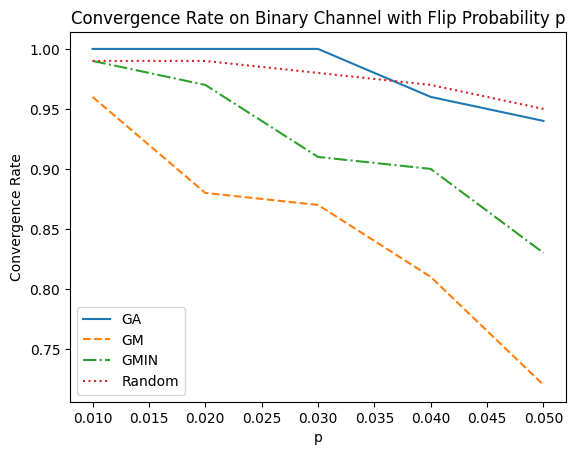

In [8]:
# plot the convergence rates
# use something other than colors to distinguish the lines
import matplotlib.pyplot as plt
line_styles = ['-', '--', '-.', ':']

plt.plot(p_values, convergence_rates_ga, label='GA', linestyle=line_styles[0])
plt.plot(p_values, convergence_rates_gal, label='GM', linestyle=line_styles[1])
plt.plot(p_values, convergence_rates_gmin, label='GMIN', linestyle=line_styles[2])
plt.plot(p_values, convergence_rates_random, label='Random', linestyle=line_styles[3])
plt.xlabel('p')
plt.ylabel('Convergence Rate')
plt.title('Convergence Rate on Binary Channel with Flip Probability p')
plt.legend()
plt.show()

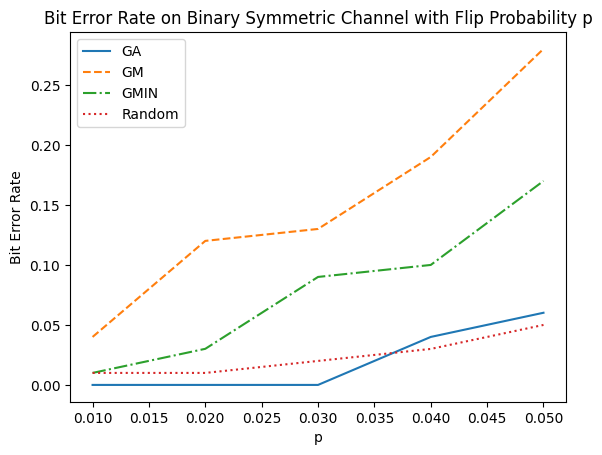

In [9]:
# plot the bit error rates
line_styles = ['-', '--', '-.', ':']

plt.plot(p_values, bit_errors_ga, label='GA', linestyle=line_styles[0])
plt.plot(p_values, bit_errors_gal, label='GM',  linestyle=line_styles[1])
plt.plot(p_values, bit_errors_gmin, label='GMIN', linestyle=line_styles[2])
plt.plot(p_values, bit_errors_random, label='Random', linestyle=line_styles[3])
plt.xlabel('p')
plt.ylabel('Bit Error Rate')
plt.title('Bit Error Rate on Binary Symmetric Channel with Flip Probability p')
plt.legend()
plt.show()

In [ ]:

convergence_rates_ga_gaussian = []
bit_errors_ga_gaussian = []
for snr in snr_values:
    print(f'Running gaussian simulation for p={snr} with GA code')
    code_ga = LDPC(ga_best_matrix)
    std = std_from_signal_to_noise_ration(snr)
    convergence_rate, bit_error_rate = run_gaussian_channel_simulation(code_ga, std, num_samples, num_iterations)
    convergence_rates_ga_gaussian.append(convergence_rate)
    bit_errors_ga_gaussian.append(bit_error_rate)

convergence_rates_gm_gaussian = []
bit_errors_gm_gaussian = []
for snr in snr_values:
    print(f'Running gaussian simulation for p={snr} with GM code')
    code_gm = LDPC(gmedian_best_matrix)
    std = std_from_signal_to_noise_ration(snr)
    convergence_rate, bit_error_rate = run_gaussian_channel_simulation(code_gm, std, num_samples, num_iterations)
    convergence_rates_gm_gaussian.append(convergence_rate)
    bit_errors_gm_gaussian.append(bit_error_rate)
    
convergence_rates_random_gaussian = []
bit_errors_random_gaussian = []
for snr in snr_values:
    print(f'Running gaussian simulation for p={snr} with random code')
    code_random = LDPC(random_matrix)
    std = std_from_signal_to_noise_ration(snr)
    convergence_rate, bit_error_rate = run_gaussian_channel_simulation(code_random, std, num_samples, num_iterations)
    convergence_rates_random_gaussian.append(convergence_rate)
    bit_errors_random_gaussian.append(bit_error_rate)

convergence_rates_gmin_gaussian = []
bit_errors_gmin_gaussian = []
for snr in snr_values:
    print(f'Running gaussian simulation for p={snr} with GMIN code')
    code_gmin = LDPC(gmin_best_matrix)
    std = std_from_signal_to_noise_ration(snr)
    convergence_rate, bit_error_rate = run_gaussian_channel_simulation(code_gmin, std, num_samples, num_iterations)
    convergence_rates_gmin_gaussian.append(convergence_rate)
    bit_errors_gmin_gaussian.append(bit_error_rate)

    

Running gaussian simulation for p=7 with GA code
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Running gaussian simulation for p=8 with GA code
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Running gaussian simulation for p=9 with GA code
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
9

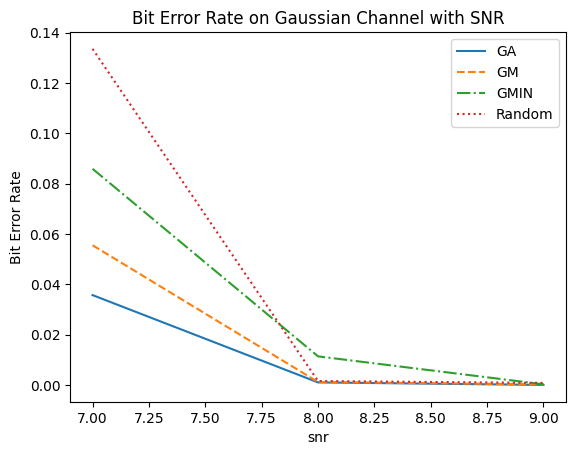

In [28]:
line_styles = ['-', '--', '-.', ':']

plt.plot(snr_values, bit_errors_ga_gaussian, label='GA', linestyle=line_styles[0])
plt.plot(snr_values, bit_errors_gm_gaussian, label='GM', linestyle=line_styles[1])
plt.plot(snr_values, bit_errors_gmin_gaussian, label='GMIN', linestyle=line_styles[2])
plt.plot(snr_values, bit_errors_random_gaussian, label='Random', linestyle=line_styles[3])
plt.xlabel('snr')
plt.ylabel('Bit Error Rate')
plt.title('Bit Error Rate on Gaussian Channel with SNR')
plt.legend()
plt.show()

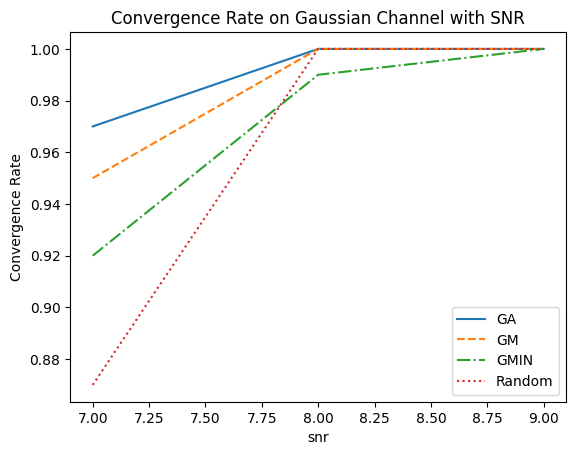

In [25]:
# plot the bit error rates
line_styles = ['-', '--', '-.', ':']

plt.plot(snr_values, convergence_rates_ga_gaussian, label='GA', linestyle=line_styles[0])
plt.plot(snr_values, convergence_rates_gm_gaussian, label='GM',  linestyle=line_styles[1])
plt.plot(snr_values, convergence_rates_gmin_gaussian, label='GMIN', linestyle=line_styles[2])
plt.plot(snr_values, convergence_rates_random_gaussian, label='Random', linestyle=line_styles[3])
plt.xlabel('snr')
plt.ylabel('Convergence Rate')
plt.title('Convergence Rate on Gaussian Channel with SNR')
plt.legend()
plt.show()